# AutoEncoder

In [2]:
import keras 
from keras.layers.core import Dense,Activation
from keras.datasets import mnist
from keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [7]:
# 学習データの準備
(x_train,_),(x_test,_) = mnist.load_data()
# 正規化(0-1)
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0
#(60000,28,28) -> (60000,784)
n_in = x_train.shape[1]*x_train.shape[2]

x_train = x_train.reshape((len(x_train),n_in))
x_test = x_test.reshape((len(x_test),n_in))
#x_train.shape

(60000, 784)

In [10]:
#モデル定義
n_out = n_in #input/output
encoding_dim = 32 #hidden layer
autoencoder = Sequential()
autoencoder.add(Dense(encoding_dim,activation='relu',input_dim=n_in))
autoencoder.add(Dense(n_out,activation='sigmoid'))
autoencoder.summary()
autoencoder.compile(optimizer='adam',
                    loss = 'binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [12]:
#学習
autoencoder.fit(x_train,
                x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test)
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s - loss: 0.2717 - val_loss: 0.1880
Epoch 2/10
60000/60000 [==============================] - 5s - loss: 0.1705 - val_loss: 0.1534
Epoch 3/10
60000/60000 [==============================] - 4s - loss: 0.1442 - val_loss: 0.1340
Epoch 4/10
60000/60000 [==============================] - 4s - loss: 0.1291 - val_loss: 0.1218
Epoch 5/10
60000/60000 [==============================] - 5s - loss: 0.1188 - val_loss: 0.1134
Epoch 6/10
60000/60000 [==============================] - 4s - loss: 0.1118 - val_loss: 0.1079
Epoch 7/10
60000/60000 [==============================] - 5s - loss: 0.1068 - val_loss: 0.1035
Epoch 8/10
60000/60000 [==============================] - 5s - loss: 0.1031 - val_loss: 0.1003
Epoch 9/10
60000/60000 [==============================] - 4s - loss: 0.1003 - val_loss: 0.0979
Epoch 10/10
60000/60000 [==============================] - 4s - loss: 0.0982 - val_loss: 0.0961

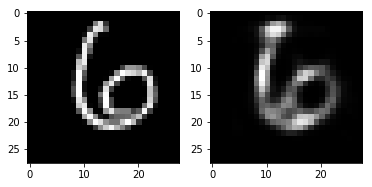

In [16]:
plt.subplot(1,2,1)
plt.imshow(x_test[100].reshape(28,28))
plt.gray()
plt.subplot(1,2,2)
decoded_image = autoencoder.predict(x_test)
plt.imshow(decoded_image[100].reshape(28,28))
plt.gray()

auto-encoderを書く上でencoderとdecoderを分ける書き方の方が良いのかもしれない.  
Sequential使うよりFunctionAPI使った方が良い感?  

# Convolutional Autoencoder

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Convolution2D,MaxPooling2D,UpSampling2D

from keras.datasets import cifar10,mnist

In [35]:
# 学習データの準備
(x_train,_),(x_test,_) = mnist.load_data()
# 正規化(0-1)
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [44]:
# 学習データの準備
(x_train,_),(x_test,_) = cifar10.load_data()
# 正規化(0-1)
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))  # adapt this if using `channels_first` image data format

In [29]:
x_train.shape

(60000, 28, 28, 1)

In [47]:
c_autoencoder = Sequential()
#Encoder
c_autoencoder.add(Convolution2D(16,3,3,
                                activation='relu',
                                border_mode='same',
                                input_shape=x_train.shape[1:]
                               ))
c_autoencoder.add(MaxPooling2D(pool_size=(2,2)))
c_autoencoder.add(Convolution2D(8,3,3,
                                activation='relu',
                                border_mode='same'
                               ))
c_autoencoder.add(MaxPooling2D(pool_size=(2,2)))
'''
c_autoencoder.add(Convolution2D(8,3,3,
                                activation='relu',
                                border_mode='same'
                               ))
c_autoencoder.add(MaxPooling2D(pool_size=(2,2)))
'''
                  
#Decoder
'''
c_autoencoder.add(Convolution2D(8,3,3,
                               activation='relu',
                               border_mode='same',
                               ))
c_autoencoder.add(UpSampling2D(size=(2,2)))
'''
c_autoencoder.add(Convolution2D(8,3,3,
                               activation='relu',
                               border_mode='same',
                               ))
c_autoencoder.add(UpSampling2D(size=(2,2)))
c_autoencoder.add(Convolution2D(16,3,3,
                               activation='relu',
                               border_mode='same',
                               ))
c_autoencoder.add(UpSampling2D(size=(2,2)))
c_autoencoder.add(Convolution2D(3,3,3,
                               activation='relu',
                               border_mode='same',
                               ))
c_autoencoder.summary()
c_autoencoder.compile(optimizer='adam',
                      loss = 'binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 8, 8, 8)           584       
_________________________________________________________________
up_sampling2d_17 (UpSampling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 16)        1168      
__________

/Users/yuki/DevLAB/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(32, 32, 3..., padding="same")`
  
/Users/yuki/DevLAB/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/Users/yuki/DevLAB/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", padding="same")`
/Users/yuki/DevLAB/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", padding="same")`
/Users/yuki/DevLAB/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), activation="

In [49]:
c_autoencoder.fit(x_train, x_train,
                  epochs=1,
                  batch_size=128,
                  shuffle=True,
                  validation_data=(x_test, x_test)
                 )

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 135s - loss: 0.6212 - val_loss: 0.5950


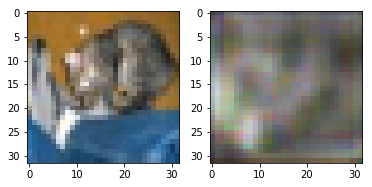

In [51]:
plt.subplot(1,2,1)
plt.imshow(x_test[0])
plt.gray()
plt.subplot(1,2,2)
decoded_image = c_autoencoder.predict(x_test)
plt.imshow(decoded_image[0])
plt.gray()